# Рейтинги Шоколадных батончиков

Проведение __Разведочного анализа данных__ для набора данных про рейтинг шоколадных батончиков

[Ссылка на Kaggle](https://www.kaggle.com/rtatman/chocolate-bar-ratings)

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('fivethirtyeight')

## Загрузка датасета

In [2]:
cacao_df = pd.read_csv('flavors_of_cacao.csv', sep=',')

In [3]:
# Исправление названий признаков
cacao_df.columns = ['Company_Name', 'Specific_Bean_Origin', 'REF', 'Review_Date', 
                    'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 
                    'Broad_Bean_Origin']

In [4]:
cacao_df.sample(5)

,Company_Name,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru
1480,"Smooth Chocolator, The",Tien Giang,1864,2016,70%,Australia,3.00,Trinitario,Vietnam
1116,Michel Cluizel,Tamarina,24,2006,70%,France,3.00,Forastero,Sao Tome
138,Askinosie,Mababa,1780,2016,68%,U.S.A.,3.75,Trinitario,Tanzania
1047,Marana,San Martin,1884,2016,70%,Peru,3.00,,Peru


## Описание признаков

* __Company_Name__ - название компании-производителя шоколадных батончиков
* __Specific_Bean_Origin__ - конкретный регион происхождения какао-бобов
* __REF__ - значение, связанное с датой введения отзыва в базу. Чем значение выше, тем позже отзыв был добавлен в базу данных
* __Review_Date__ - дата публикации отзыва
* __Cocoa_Percent__ - процентное содержание какао
* __Company_Location__ - страна-производитель
* __Rating__ - экспертная оценка шоколадного батончика
* __Bean_Type__ - сорт какао-боба
* __Broad_Bean_Origin__ - широкий географический регион происхождения какао-бобов

## Описание набора данных

In [5]:
cacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_Name          1795 non-null   object 
 1   Specific_Bean_Origin  1795 non-null   object 
 2   REF                   1795 non-null   int64  
 3   Review_Date           1795 non-null   int64  
 4   Cocoa_Percent         1795 non-null   object 
 5   Company_Location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean_Type             1794 non-null   object 
 8   Broad_Bean_Origin     1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
cacao_df.describe()

,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [7]:
cacao_df.describe(include='object')

,Company_Name,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Bean_Type,Broad_Bean_Origin
count,1795,1795,1795,1795,1794,1794
unique,416,1039,45,60,41,100
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,47,57,672,764,887,214


## Заполнение пропусков

In [8]:
cacao_df.Bean_Type.dropna(inplace=True)
cacao_df.Bean_Type = cacao_df.Bean_Type.apply(lambda bt: bt if bt != '\xa0' else 'Unknown')

In [10]:
cacao_df.Broad_Bean_Origin.dropna(inplace=True)
cacao_df.Broad_Bean_Origin = cacao_df.Broad_Bean_Origin.apply(lambda bo: bo if bo != '\xa0' else 'Unknown')

# Анализ количественных данных

In [11]:
# Переводим процент какао в количественную переменную
cacao_df.Cocoa_Percent = cacao_df.Cocoa_Percent.apply(lambda cp: cp[:-1]).astype(float)

In [12]:
cacao_df.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


## REF

<AxesSubplot:>

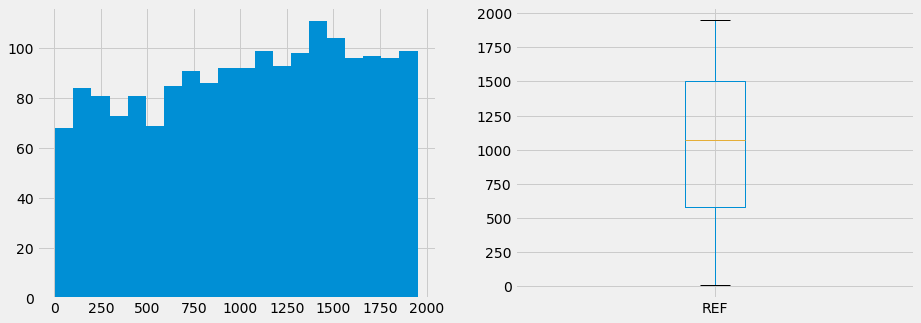

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cacao_df.REF.hist(bins=20, ax=axes[0])
cacao_df.boxplot(column='REF', ax=axes[1])

Как видно, REF не содержит выбросов

## Review_Date

<AxesSubplot:>

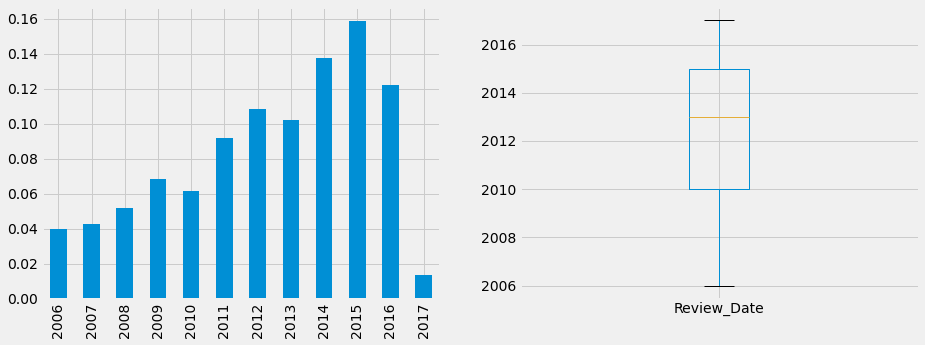

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cacao_df.Review_Date.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0]);
cacao_df.boxplot(column='Review_Date', ax=axes[1])

Review_Date также не содержит выбросов, причем количество добавлений отзывов растет с годом, но до 2015 года

## Cocoa_Percent

<AxesSubplot:>

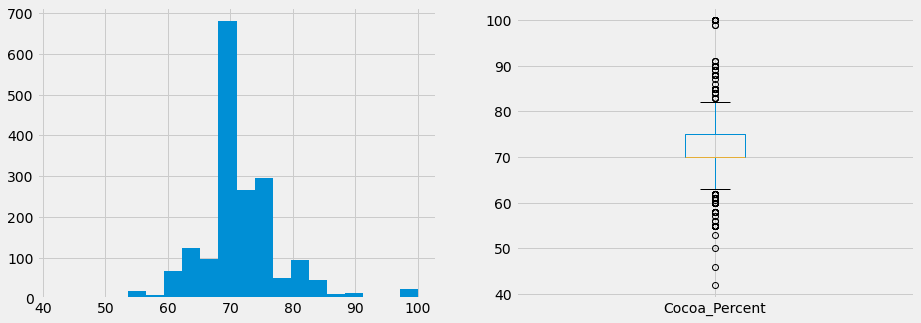

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cacao_df.Cocoa_Percent.hist(bins=20, ax=axes[0])
cacao_df.boxplot(column='Cocoa_Percent', ax=axes[1])

По графикам видно, что переменная имеет выбросы в обоих направлениях

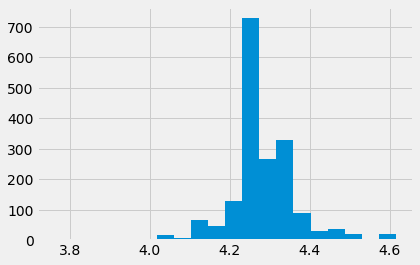

In [16]:
cacao_df.Cocoa_Percent.apply(lambda w: np.log(w + 1)).hist(bins=20);

Логарифмирование не даст улучшения, так как переменная имеет тяжелые хвосты в том и другом направлении

## Rating

<AxesSubplot:>

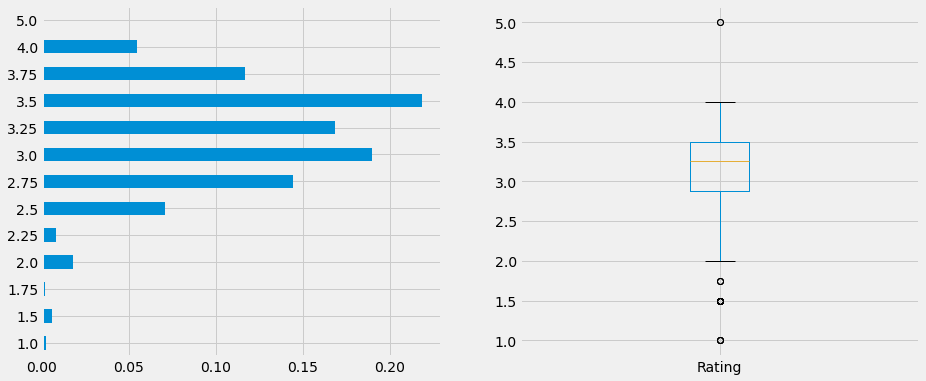

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cacao_df.Rating.value_counts(normalize=True).sort_index().plot(kind='barh', ax=axes[0])
cacao_df.boxplot(column='Rating', ax=axes[1])

In [18]:
cacao_df.Rating.value_counts().sort_index()

1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: Rating, dtype: int64

Переменная имеет выбросы, связанные с 2 максимальными оценками и 17 минимальными оценками

# Анализ совокупности количественных признаков

Рассмотрим, влияет ли процентное содержание какао на оценку

<AxesSubplot:xlabel='Cocoa_Percent', ylabel='Rating'>

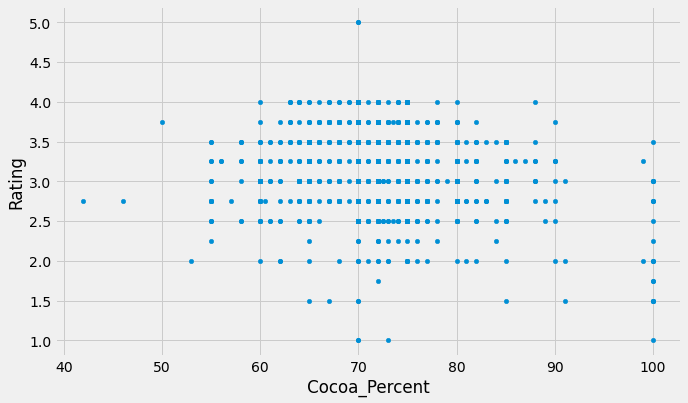

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
cacao_df.plot(x='Cocoa_Percent', y='Rating', kind='scatter', ax=ax)

Удивительно, но максимальную оценку получили батончики, имеющие 70 процентное содержание какао.

100-процентное содержание какао не обеспечивает высокой оценки. Возможно это связано с тем, что эксперты считали, что высокое содержание какао улучшит вкус и ощущения, но этого не происходило и эксперт разочаровывался в батончике с высоким содержанием шоколада.

Теперь узнаем о корреляции между двумя этими признаками

In [20]:
correlation = cacao_df[['Cocoa_Percent', 'Rating']].corr().iloc[0, 1]
print(correlation)

-0.1648201776242442


Видно, что линейная зависимость очень слабая, из чего следует, что содержание какао не влияет на рейтинг

Построим графики для оценки зависимости между остальными признаками

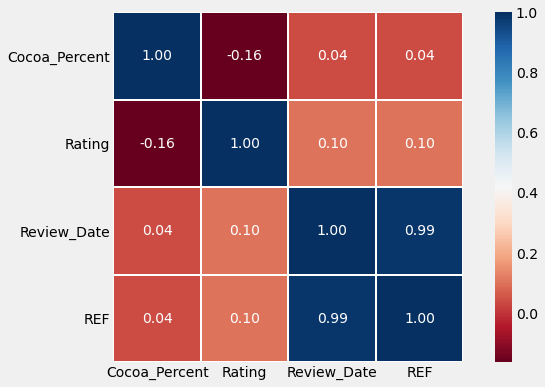

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cacao_df[['Cocoa_Percent', 'Rating', 'Review_Date', 'REF']].corr( ), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

Заметим, что признаки REF и Review_Date зависимы и не оказывают значительного влияния на другие признаки. Перед постройкой модели нужно будет удалить один из признаков времени, чтобы модель не "споткнулась" об колинеарные признаки.

# Анализ категориальных данных

In [22]:
cacao_df.describe(include="object")

,Company_Name,Specific_Bean_Origin,Company_Location,Bean_Type,Broad_Bean_Origin
count,1795,1795,1795,1794,1794
unique,416,1039,60,41,100
top,Soma,Madagascar,U.S.A.,Unknown,Venezuela
freq,47,57,764,887,214


## Company_Name

Посмотрим на 20 компаний с наибольшим количеством оценок

In [24]:
company_series = cacao_df.Company_Name.value_counts().sort_values(ascending=False)[:20]
company_series

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Guittard                      22
Domori                        22
Arete                         22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Mast Brothers                 18
Coppeneur                     18
Zotter                        17
Scharffen Berger              17
Artisan du Chocolat           16
Dandelion                     16
Smooth Chocolator, The        16
Rogue                         16
Szanto Tibor                  15
Castronovo                    14
Name: Company_Name, dtype: int64

Если интерпретировать оценки как оценки на разные шоколадные батончики, то лидером по количеству батончиков выступает компания Soma

## Specific_Bean_Origin

In [25]:
cacao_df.Specific_Bean_Origin.value_counts().sort_values(ascending=False)[:10]

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Chuao                 19
Sambirano             19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Name: Specific_Bean_Origin, dtype: int64

## Broad_Bean_Origin

In [26]:
cacao_df.Broad_Bean_Origin.value_counts().sort_values(ascending=False)[:10]

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Unknown                73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Broad_Bean_Origin, dtype: int64

## Bean_Type

In [27]:
bean_type_series = cacao_df.Bean_Type.value_counts().sort_values(ascending=False)[:10]
bean_type_series

Unknown                 887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Blend                    41
Criollo, Trinitario      39
Forastero (Arriba)       37
Criollo (Porcelana)      10
Trinitario, Criollo       9
Name: Bean_Type, dtype: int64

## Company_Location

In [28]:
company_location_series = cacao_df.Company_Location.value_counts().sort_values(ascending=False)[:20]
company_location_series

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Austria         26
Spain           25
Colombia        23
Hungary         22
Venezuela       20
New Zealand     17
Japan           17
Peru            17
Brazil          17
Madagascar      17
Name: Company_Location, dtype: int64

Можно сказать, что США является лидером среди стран по производству шоколадных батончиков, но какие это батончики?

# Анализ совокупности количественных и категориальных признаков

### Зависимость оценки от страны

In [31]:
temp_df = cacao_df[['Company_Location', 'Rating']].copy()
temp_df.Company_Location = temp_df.Company_Location.apply(lambda cl: cl if cl in company_location_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Company_Location'>

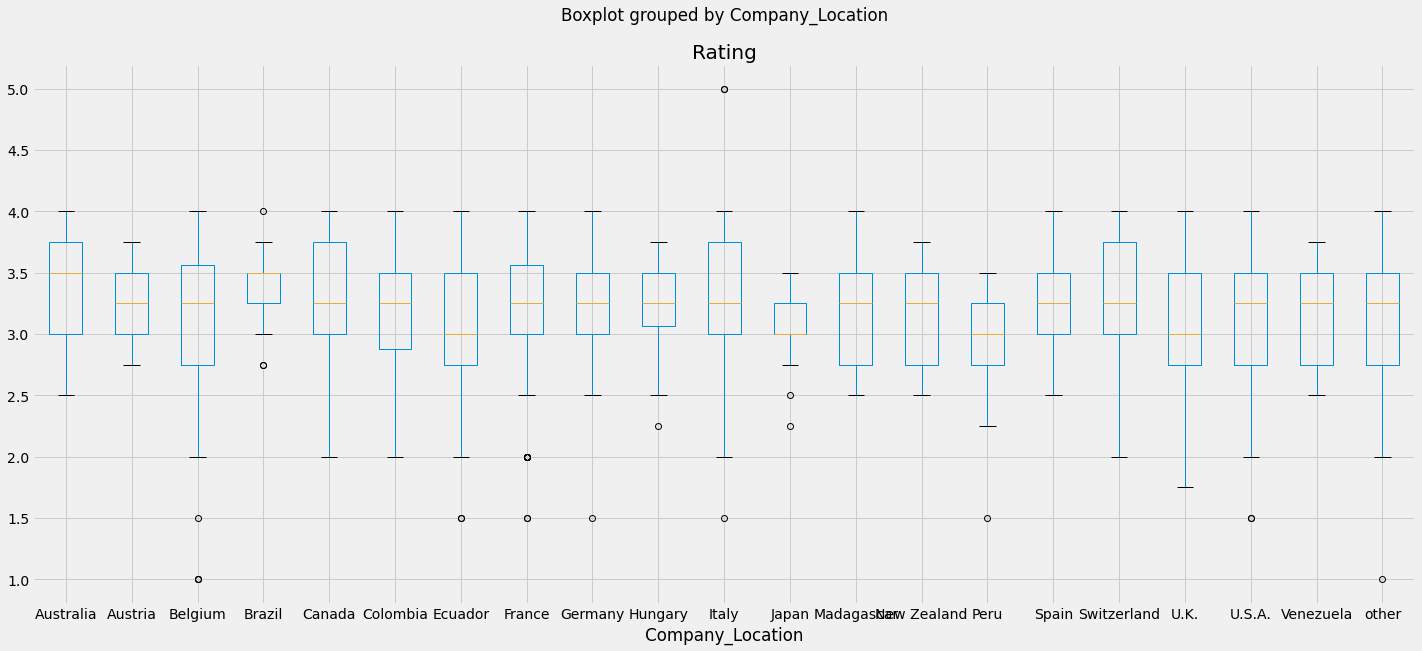

In [32]:
temp_df.boxplot('Rating', by='Company_Location', figsize=(24, 10))

Глядя на медианное значение оценки представленных ящиков с усами, можно выделить страны, шоколад которых эксперты оценивают достаточно высоко. Это Австралия и Бразилия. Остальные страны имеют схожие медианные значения оценок.

По графику также видно, что самая низкая оценка принадлежит шоколаду из Бельгии, а самая высокая оценка приналежит шоколаду из Италии.

Посчитаем для каждой страны среднюю оценку её шоколадных батончиков, это также позволит определить, какая страна производит лучший шоколадный батончик. Так как в рейтинге были выбросы, то будем использовать робастную среднюю оценку - медиану.

<AxesSubplot:ylabel='Company_Location'>

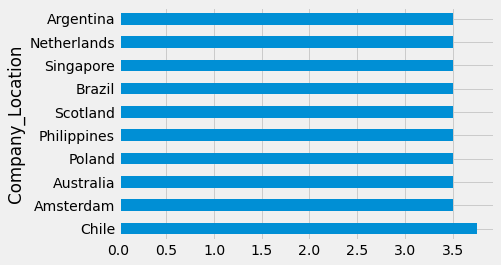

In [50]:
best_country = cacao_df.groupby('Company_Location')['Rating'].agg('median').sort_values(ascending=False)[:10]
best_country.plot(kind='barh')

По графику видно, что Чили является страной с лучшим рейтингом шоколадных батончиков. Можем обратиться к более подробной информации.

In [47]:
cacao_df[cacao_df['Company_Location'] == 'Chile']

,Company_Name,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1200,Obolo,Pangoa,1638,2015,70.0,Chile,3.75,Criollo,Peru
1201,Obolo,"Pangoa, w/ nibs",1638,2015,70.0,Chile,3.75,Criollo,Peru


Австралия и Бразилия уступают Чили, хотя в их ассортименте было больше оценок из-за большего числа видов шоколадных батончиков

In [57]:
print("Число оценок у Австралии: " + str(len(cacao_df[cacao_df['Company_Location'] == 'Australia'])))

Число оценок у Австралии: 49


In [56]:
print("Число оценок у Бразилии: " + str(len(cacao_df[cacao_df['Company_Location'] == 'Brazil'])))

Число оценок у Бразилии: 17


### Зависимость оценки от типа какао-боба

In [58]:
temp_df = cacao_df[['Bean_Type', 'Rating']].copy()
temp_df.Bean_Type = temp_df.Bean_Type.apply(lambda bt: bt if bt in bean_type_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Bean_Type'>

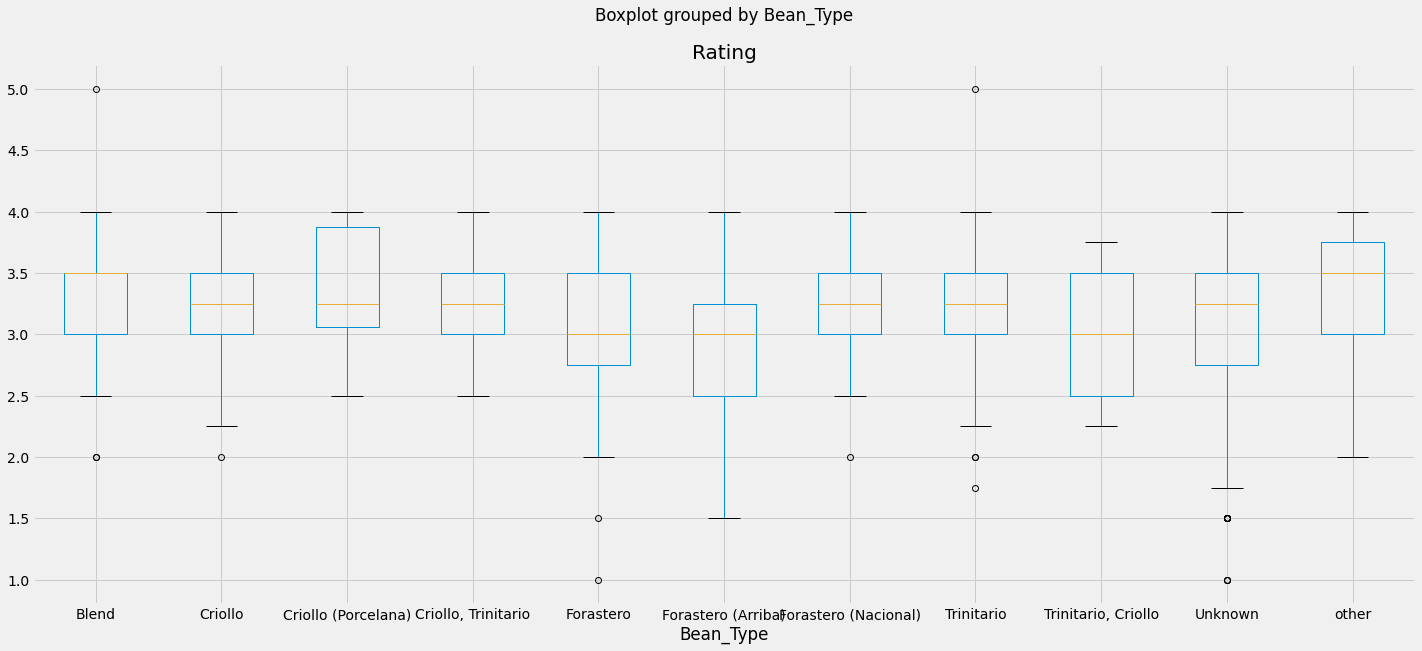

In [59]:
temp_df.boxplot('Rating', by='Bean_Type', figsize=(24, 10))

Бобы типа Blend и Trinitario завоевали самые высокие оценки засчет шоколадов, которые были произведенены из этих бобов.

<AxesSubplot:ylabel='Bean_Type'>

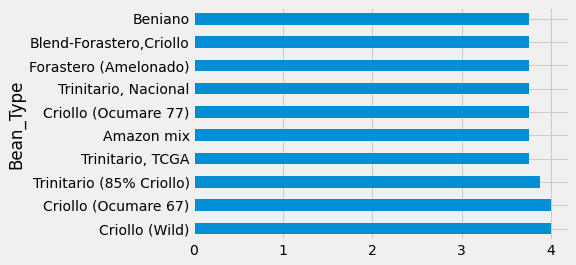

In [60]:
best_type = cacao_df.groupby('Bean_Type')['Rating'].agg('median').sort_values(ascending=False)[:10]
best_type.plot(kind='barh')

По графику видно, что тип какао-боба, давший наилучшую оценку это Criollo, хотя и данных всего по одному батончику.

In [68]:
cacao_df[cacao_df['Bean_Type'] == 'Criollo (Wild)']

,Company_Name,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
649,Felchlin,"Alto Beni, Cru Savage",56,2006,68.0,Switzerland,4.0,Criollo (Wild),Bolivia


In [69]:
cacao_df[cacao_df['Bean_Type'] == 'Criollo (Ocumare 67)']

,Company_Name,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
573,Domori,"Ocumare 67, Puertofino",192,2007,70.0,Italy,4.0,Criollo (Ocumare 67),Venezuela


### Зависимость оценки от компании

In [72]:
temp_df = cacao_df[['Company_Name', 'Rating']].copy()
temp_df.Company_Name = temp_df.Company_Name.apply(lambda c: c if c in company_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Company_Name'>

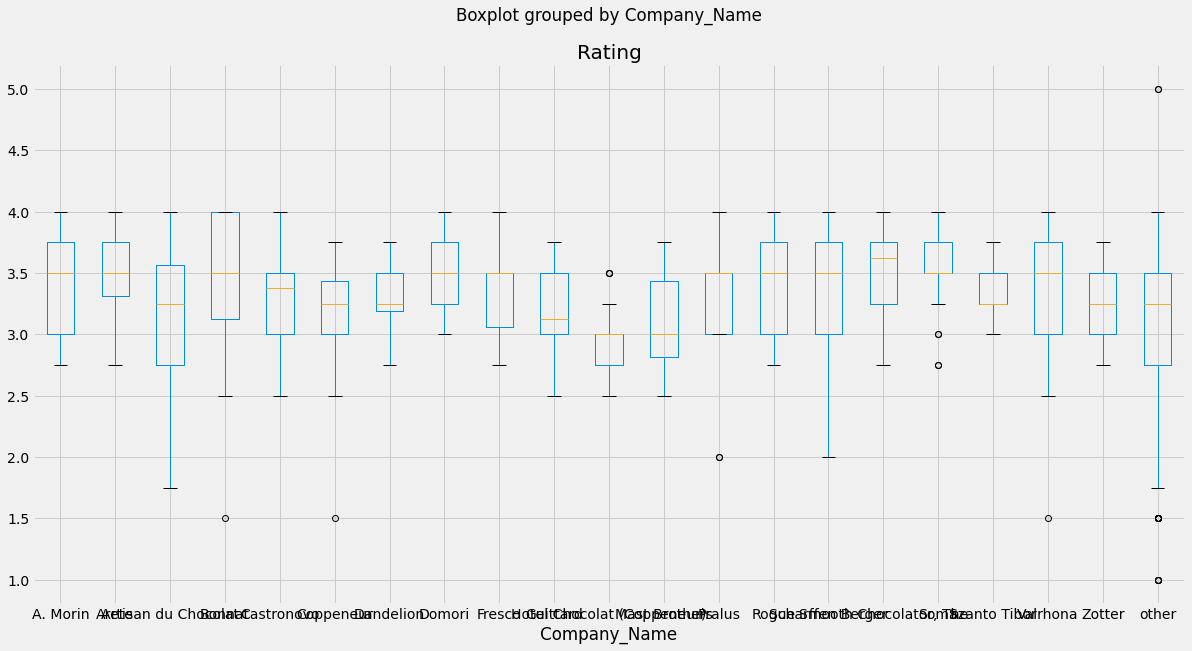

In [74]:
temp_df.boxplot('Rating', by='Company_Name', figsize=(20, 10))

По графику видно, что лучшая медианная оценка достигается у компани __The Smooth Chocolator__

А лучшие шоколадные батончики оказались в группу other, что наталкивает на мысль о том, что лучшие шоколады производятся компаниями, у которых небольшой ассортимент шоколада (поэтому и оценок меньше).

<AxesSubplot:ylabel='Company_Name'>

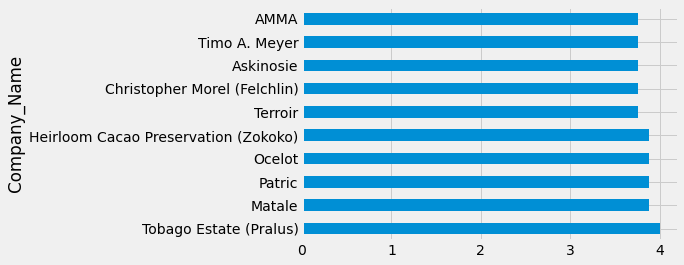

In [75]:
best_company = cacao_df.groupby('Company_Name')['Rating'].agg('median').sort_values(ascending=False)[:10]
best_company.plot(kind='barh')

Из графика видно, что лучшая компания по производству шоколадных батончиков, исходя из оценки, это __Tobago Estate__, имеющая, правда, всего один вид шоколада

In [77]:
cacao_df[cacao_df['Company_Name'] == 'Tobago Estate (Pralus)']

,Company_Name,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,70.0,France,4.0,Trinitario,Tobago


### Где растут самые лучшие какао-бобы для шоколадных батончиков

<AxesSubplot:ylabel='Broad_Bean_Origin'>

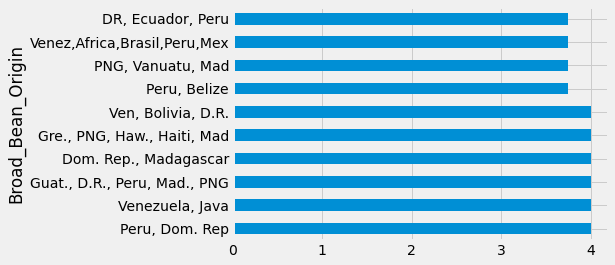

In [79]:
best_origin = cacao_df.groupby('Broad_Bean_Origin')['Rating'].agg('median').sort_values(ascending=False)[:10]
best_origin.plot(kind='barh')

По графику можно понять, какие регионы дают лучшие какао-бобы